## Introduction:
In this project, I performed a complete machine learning pipeline to classify booking statuses using Python and libraries like Pandas, Scikit-learn, and Matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### **1. Data Loading and Preprocessing:**
- Loaded the dataset using Pandas.
- Checked for missing values and dropped any incomplete records.
- Removed whitespace from column names for consistency.
- Verified that the target column ('booking status') was present and binary.

In [2]:
# Load the dataset
data = pd.read_csv(r"E:\..............A\my work\cours\mli\task1\first inten project.csv", low_memory=False)

In [3]:
# Data Preprocessing
print("Initial Data Info:")
print(data.info(memory_usage='deep'))
print("\nChecking for missing values:")
print(data.isnull().sum())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  

In [4]:
# Dropping missing
data.dropna(inplace=True)  

In [5]:
# Removing white spaces
data.columns = data.columns.str.strip()  

In [6]:
# Ensure correct target column name
target = 'booking status'
if target not in data.columns:
    target = next((col for col in data.columns if 'booking' in col.lower()), None)

if target is None:
    raise ValueError("Target column not found in dataset")

In [7]:
# Confirm the target is binary
unique_values = data[target].nunique()
if unique_values != 2:
    raise ValueError(f"Target column '{target}' is not binary. Unique values found: {unique_values}")

### **2. Encoding Categorical Features:**
- Converted categorical columns into numerical values using `LabelEncoder`.
- Optimized memory usage by encoding columns with many unique categories.

In [8]:
# Encoding Categorical Features
def encode_categorical(df):
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].nunique() == 2:
            df[col] = LabelEncoder().fit_transform(df[col])
        else:
            df[col] = df[col].astype('category').cat.codes  # More memory-efficient
    return df

data = encode_categorical(data)

### **3. Handling Outliers:**
- Applied the IQR (Interquartile Range) method to detect and remove outliers from numeric columns.

In [9]:
# Handling Outliers using IQR
numeric_cols = data.select_dtypes(include=['number']).columns
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
mask = ~((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

data = data[mask]

### **4. Feature Selection:**
- Computed a correlation matrix.
- Dropped features with a correlation above 0.9 to prevent multicollinearity.


In [10]:
# Feature Selection - Remove highly correlated features
corr_matrix = data[numeric_cols].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
data.drop(columns=to_drop, inplace=True)

### **5. Train-Test Split and Standardization:**
- Split the dataset into training and testing sets using an 80-20 ratio.
- Standardized the numerical features using `StandardScaler`.

In [11]:
# Train-Test Split
X = data.drop(columns=[target])
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **6. Modeling and Evaluation:**
- Trained a Random Forest Classifier and evaluated its performance with accuracy, a classification report, and a confusion matrix.
- Added a Logistic Regression model to compare performance.
- Visualized confusion matrices for both models using `seaborn`.

In [13]:
# Modeling
model = RandomForestClassifier(n_jobs=-1, random_state=42)  # Parallel processing to reduce memory load
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [14]:
# Predictions
y_pred = model.predict(X_test)

In [15]:
# Accuracy Calculation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       700
           1       0.91      0.96      0.94      1571

    accuracy                           0.91      2271
   macro avg       0.91      0.88      0.89      2271
weighted avg       0.91      0.91      0.91      2271



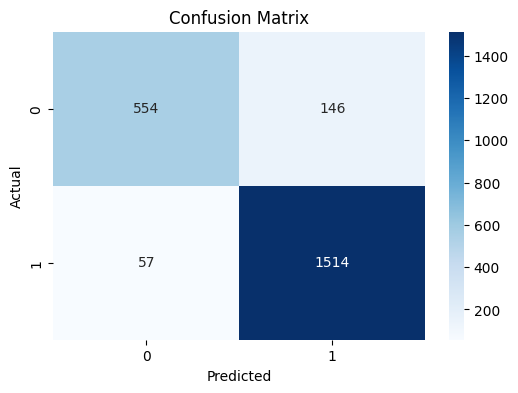

In [16]:
# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### **Results:**
- Displayed accuracy scores and classification metrics for both models.
- Compared the effectiveness of Random Forest and Logistic Regression models.

In [17]:
# Logistic Regression Model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [18]:
# Logistic Regression Evaluation
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.76      0.59      0.66       700
           1       0.83      0.91      0.87      1571

    accuracy                           0.82      2271
   macro avg       0.80      0.75      0.77      2271
weighted avg       0.81      0.82      0.81      2271



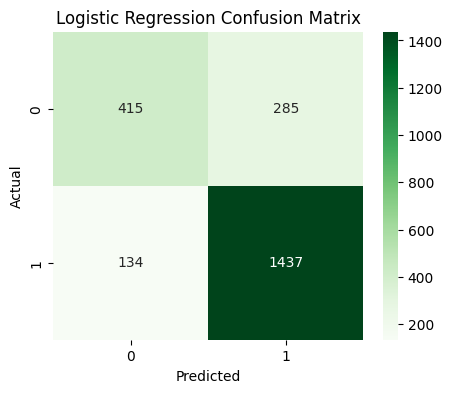

In [19]:
# Logistic Regression Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Greens')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **Conclusion:**
This project demonstrates the full data science pipeline: from preprocessing and feature engineering to model building and evaluation, providing insights into binary classification techniques using both Random Forest and Logistic Regression.